In [2]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt

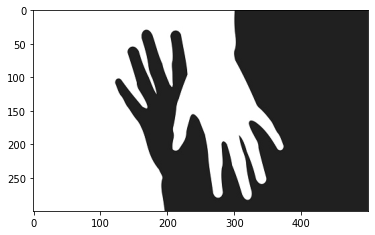

In [118]:
img = cv2.imread("../img/hand.jpg", cv2.IMREAD_GRAYSCALE)


plt.imshow(img, "gray")


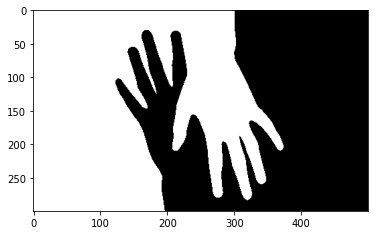

In [119]:
t, img = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
img=img//255
plt.imshow(img,"gray")

In [132]:
kernel = np.ones((3,3), np.float32)
kw = kernel.shape[1]//2
kh = kernel.shape[0]//2
print(kh, kw)

1 1


In [122]:
mimg = cv2.copyMakeBorder(img, kh, kh, kw,kw, cv2.BORDER_CONSTANT, (0,0,0,))
print(mimg.shape)

(302, 502)


In [123]:
op = np.zeros((mimg.shape), np.float32)
op.shape

(302, 502)

In [124]:
for i in range(kh,mimg.shape[0]-kh):
    for  j in range(kw,mimg.shape[1]-kw):
        
        flag = 0
        for x in range(-kh, kh+1):
            for y in range(-kw, kw+1):
                
                if (i+x)<mimg.shape[0] and (i+x)>=0 and (j+y)<mimg.shape[1] and (j+y)>=0:
                    
                    if kernel[x+kh][y+kw]==mimg[i+x][y+j]:
                        flag=1
                        
        if(flag==0):
            op[i, j]=0
        else:
            op[i, j]=1

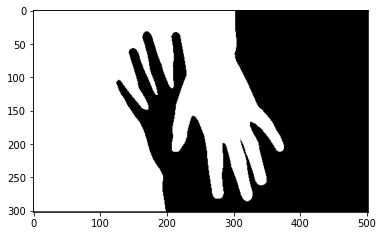

In [129]:
plt.imshow(op,"gray")

In [126]:
opbl = np.zeros((img.shape), np.float32)

In [127]:
for i in range(kh,op.shape[0]-kh) :
    for j in range(kw,op.shape[1]-kw):
        opbl[i-kh,j-kw] = op[i,j]
print(opbl)

[[1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]]


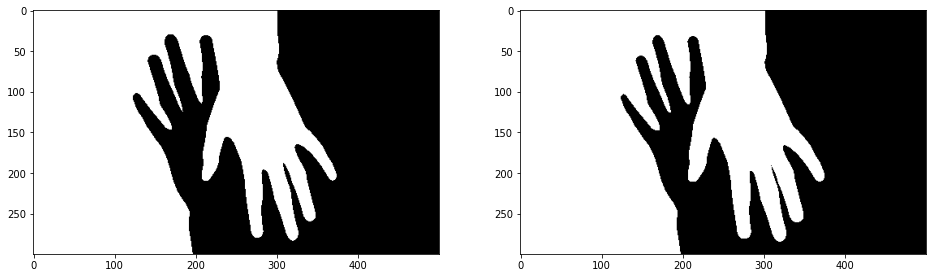

In [131]:
figure, axis = plt.subplots(1,2, figsize=(16,6))
axis[0].imshow(img, "gray")
axis[1].imshow(opbl, "gray")

In [35]:
def _dilation(img, kernel):
    kh = kernel.shape[0]//2
    kw = kernel.shape[1]//2
    op = np.zeros((img.shape), np.uint8)
    m, n = img.shape


    for i in range(m):
        for j in range(n):
            flag = 0
            for x in range(-kh, kh+1):
                for y in range(-kw, kw+1):
                    if (i-x)<img.shape[0] and (i-x)>=0 and (j-y)<img.shape[1] and (j-y)>=0:
                        if kernel[x+kh][y+kw]==img[i-x][j-y]:
                            flag=1
            if (flag):
                op[i][j]=1
            else:
                op[i][j]=0
    return op

In [36]:
img = np.ones((5,6), np.uint8)
img[0,0]=img[0,1]=img[2:5,3:6]=0
print(img)
kernel = np.ones((3,3), np.uint8)
print(kernel)

[[0 0 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]
 [1 1 1 0 0 0]]
[[1 1 1]
 [1 1 1]
 [1 1 1]]


[[1 1 1]
 [1 1 1]
 [1 1 1]]


In [37]:
output = _dilation(img, kernel)
print(output)

[[1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 1 1]
 [1 1 1 1 0 0]
 [1 1 1 1 0 0]]


In [39]:
#Erosion dialation

import cv2
import math
import numpy as np
from copy import deepcopy as dpc

flag_d = 0
flag_e = 1

img = np.zeros((9,9), np.uint8)

img[2:7,2:5]=img[4:7,5:7]=1
print(img)
kernel = np.zeros((3,3), np.uint8)
kernel[:,1]=kernel[1,:]=1
print(kernel)

# se = np.array([[1,1,1],
#                [1,1,1],
#                [1,1,1]])
# se_r = se.shape[0]
se = kernel
se_r = kernel.shape[0]
pad = math.floor(se_r/2)

inp = cv2.imread('../img/hand.jpg')



img_r = img.shape[0]
img_c = img.shape[1]

out_e = np.zeros_like(img)
out_d = np.zeros_like(img)

#erosion
for i in range(img_r-math.ceil(se_r/2)):
    for j in range(img_c-math.ceil(se_r/2)):
        for x in range(se_r):
            for y in range(se_r):
                if img[i+x][j+y] != se[x][y]:
                    flag_e = 0
        if(flag_e):
            out_e[i+pad][j+pad] = 1
        else:
            out_e[i+pad][j+pad] = 0
        flag_e = 1

#dialation
for i in range(img_r-math.ceil(se_r/2)):
    for j in range(img_c-math.ceil(se_r/2)):
        for x in range(se_r):
            for y in range(se_r):
                if img[i+x][j+y] == se[x][y] and img[i+x][j+y] == 1:
                    flag_d = 1
        if(flag_d):
            out_d[i+pad][j+pad] = 1
        else:
            out_d[i+pad][j+pad] = 0
        flag_d = 0
print(out_e)

# cv2.imshow("input",img)
# cv2.imshow("erosion",out_e)
# cv2.imshow("dial",out_d)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 1 1 1 0 0 0 0]
 [0 0 1 1 1 0 0 0 0]
 [0 0 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 1 0 0]
 [0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0]]
